In [3]:
from sklearn.datasets import load_iris
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_1samp
import pandas as pd

In [22]:
data = pd.read_csv("C:/Users/Eniifeoluwa/Desktop/iris_dataset.csv")
data.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa


In [30]:
# Filter the data for Iris setosa species
setosa = data[data["target"] == "Iris-setosa"]

# Extract petal length
petal_lengths = setosa["petal length (cm)"]


In [31]:

hypothesized_mean = 1.5
alpha = 0.05


t_stat, p_value = ttest_1samp(petal_lengths, hypothesized_mean)

# Print the results
print(f"t-statistic: {t_stat}")
print(f"p-value: {p_value}")

# Check if we reject or fail to reject the null hypothesis
if p_value < alpha:
    print("Reject the null hypothesis: The mean petal length is significantly different from 1.5 cm.")
else:
    print("Fail to reject the null hypothesis: No significant difference from 1.5 cm.")


t-statistic: -1.4671012634227616
p-value: 0.1487379411362013
Fail to reject the null hypothesis: No significant difference from 1.5 cm.


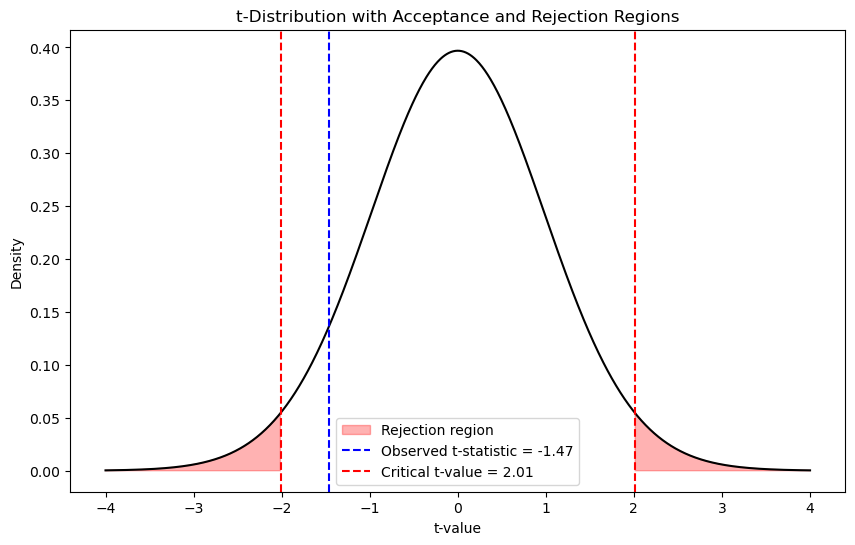

In [34]:
import scipy.stats as stats

# Calculate critical t-value for a two-tailed test
df = len(petal_lengths) - 1
critical_t = stats.t.ppf(1 - alpha/2, df)

# Plot distribution of t values
x = np.linspace(-4, 4, 1000)
y = stats.t.pdf(x, df)

plt.figure(figsize=(10, 6))
plt.plot(x, y, color='black')
plt.fill_between(x, y, where=(x >= critical_t) | (x <= -critical_t), color='red', alpha=0.3, label="Rejection region")
plt.axvline(t_stat, color='blue', linestyle='--', label=f"Observed t-statistic = {t_stat:.2f}")

# Annotate the critical values
plt.axvline(critical_t, color='red', linestyle='--', label=f"Critical t-value = {critical_t:.2f}")
plt.axvline(-critical_t, color='red', linestyle='--')

# Labels and legend
plt.title("t-Distribution with Acceptance and Rejection Regions")
plt.xlabel("t-value")
plt.ylabel("Density")
plt.legend()
plt.show()
